# Insertion of required python modules

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [2]:
data = pd.read_csv('brain_size.csv', sep=';', na_values=".")

In [3]:
data.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118,64.5,816932
1,2,Male,140,150,124,135,72.5,1001121
2,3,Male,139,123,150,143,73.3,1038437
3,4,Male,133,129,128,172,68.8,965353
4,5,Female,137,132,134,147,65.0,951545


In [4]:
t = np.linspace(-6, 6, 20)

In [5]:
sin_t = np.sin(t)
cos_t = np.cos(t)

In [6]:
pd.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


## lists number of rows, columns

In [7]:
data.shape 

(40, 8)

**lists names of columns and prints values of selected columns** 

In [8]:
data.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [9]:
print(data['Gender'])

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object


**outputting the mean value of VIQ of all of the female from the gender column**

In [10]:
data[data['Gender'] == 'Female']['VIQ'].mean()

109.45

**comparing the means of data from categorical variables**

In [11]:
groupby_gender = data.groupby('Gender')

In [12]:
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


**universal grouping of data**

In [13]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.20,65.765,862654.6
Male,21.35,115.0,115.25,111.60,164.35,71.510,954855.4


# mean VIQ value for population

In [14]:
data.VIQ.mean()

112.35

# total number of female and male subjects

In [15]:
groupby_gender.count()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,20,20,20,20,20,20,20
Male,20,20,20,20,20,20,20


# values of average MRI in log

In [16]:
 for gender, value in groupby_gender['MRI_Count']:
    print((gender, value.mean())) 

('Female', 862654.6)
('Male', 954855.4)


In [17]:
fmMRI=862654.6

In [18]:
mlMRI=954855.4


In [19]:
"{:e}".format(862654.6)

'8.626546e+05'

In [20]:
"{:e}".format(mlMRI)

'9.548554e+05'

In [21]:
from pandas.plotting import scatter_matrix

# creation of scatter matrcies

array([[<AxesSubplot:xlabel='Weight', ylabel='Weight'>,
        <AxesSubplot:xlabel='Height', ylabel='Weight'>,
        <AxesSubplot:xlabel='MRI_Count', ylabel='Weight'>],
       [<AxesSubplot:xlabel='Weight', ylabel='Height'>,
        <AxesSubplot:xlabel='Height', ylabel='Height'>,
        <AxesSubplot:xlabel='MRI_Count', ylabel='Height'>],
       [<AxesSubplot:xlabel='Weight', ylabel='MRI_Count'>,
        <AxesSubplot:xlabel='Height', ylabel='MRI_Count'>,
        <AxesSubplot:xlabel='MRI_Count', ylabel='MRI_Count'>]],
      dtype=object)

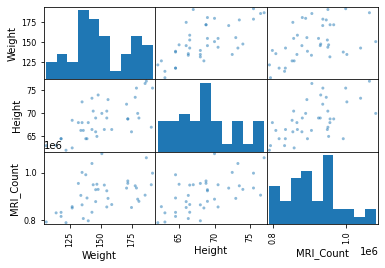

In [22]:
scatter_matrix(data[['Weight', 'Height', 'MRI_Count']]) 

array([[<AxesSubplot:xlabel='PIQ', ylabel='PIQ'>,
        <AxesSubplot:xlabel='VIQ', ylabel='PIQ'>,
        <AxesSubplot:xlabel='FSIQ', ylabel='PIQ'>],
       [<AxesSubplot:xlabel='PIQ', ylabel='VIQ'>,
        <AxesSubplot:xlabel='VIQ', ylabel='VIQ'>,
        <AxesSubplot:xlabel='FSIQ', ylabel='VIQ'>],
       [<AxesSubplot:xlabel='PIQ', ylabel='FSIQ'>,
        <AxesSubplot:xlabel='VIQ', ylabel='FSIQ'>,
        <AxesSubplot:xlabel='FSIQ', ylabel='FSIQ'>]], dtype=object)

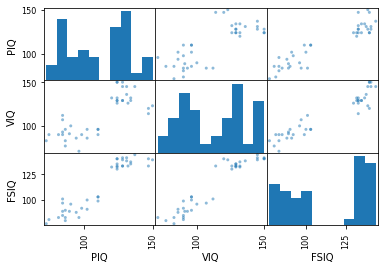

In [23]:
scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])

# comparative boxplot

Female         AxesSubplot(0.1,0.15;0.363636x0.75)
Male      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

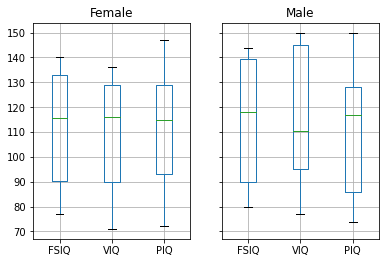

In [24]:
groupby_gender.boxplot(column=['FSIQ', 'VIQ', 'PIQ'])

# Comparative Male and Female scatter matricies

array([[<AxesSubplot:xlabel='VIQ', ylabel='VIQ'>,
        <AxesSubplot:xlabel='MRI_Count', ylabel='VIQ'>,
        <AxesSubplot:xlabel='Height', ylabel='VIQ'>],
       [<AxesSubplot:xlabel='VIQ', ylabel='MRI_Count'>,
        <AxesSubplot:xlabel='MRI_Count', ylabel='MRI_Count'>,
        <AxesSubplot:xlabel='Height', ylabel='MRI_Count'>],
       [<AxesSubplot:xlabel='VIQ', ylabel='Height'>,
        <AxesSubplot:xlabel='MRI_Count', ylabel='Height'>,
        <AxesSubplot:xlabel='Height', ylabel='Height'>]], dtype=object)

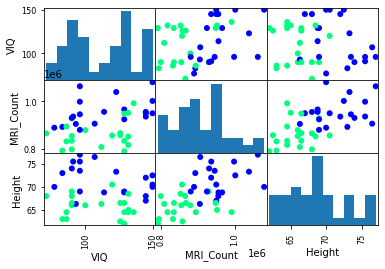

In [25]:
scatter_matrix(data[['VIQ', 'MRI_Count', 'Height']],
                        c=(data['Gender'] == 'Female'), marker='o',
                        alpha=1, cmap='winter')




**assign male and female VIQ datavariable**

In [26]:
female_viq = data[data['Gender'] == 'Female']['VIQ']

In [27]:
male_viq = data[data['Gender'] == 'Male']['VIQ']

**1-sample t-test**

In [28]:
stats.ttest_ind(female_viq, male_viq)

Ttest_indResult(statistic=-7.726161723275011e-01, pvalue=0.44452876778583217)

**2-sample t-test: testing for difference across populations**

In [29]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])   

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

**two sample t-test**

In [30]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

**paired t-test**

In [31]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)   

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

**nonparametric t-test**

In [32]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])   


WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

**Assign variables for male and female weight** 

In [33]:
female_wt = data[data['Gender'] == 'Female']['Weight']

In [34]:
male_wt = data[data['Gender'] == 'Male']['Weight']

In [35]:
stats.ttest_1samp(data['Weight'], 0)

Ttest_1sampResult(statistic=41.41609420115458, pvalue=7.482289053440119e-34)

**test the differecne of weight in male and females**

In [36]:
stats.ttest_ind(male_wt, female_wt)

Ttest_indResult(statistic=4.588540768019845, pvalue=4.757239652605922e-05)

**test difference between male and femal VIQ**

In [37]:
stats.mannwhitneyu(female_viq, male_viq)

MannwhitneyuResult(statistic=164.5, pvalue=0.3422886868727315)

In [38]:
x = np.linspace(-5, 5, 20)

In [39]:
np.random.seed(1)

In [40]:
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)

In [41]:
data = pd.DataFrame({'x': x, 'y': y})

In [42]:
model = ols("y ~ x", data).fit()

In [43]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Fri, 12 Jul 2024   Prob (F-statistic):           8.56e-08
Time:                        21:22:45   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

**extract parameters**

In [44]:
print(model.predict())

[-20.21790012 -18.67216943 -17.12643874 -15.58070805 -14.03497735
 -12.48924666 -10.94351597  -9.39778528  -7.85205458  -6.30632389
  -4.7605932   -3.21486251  -1.66913181  -0.12340112   1.42232957
   2.96806026   4.51379095   6.05952165   7.60525234   9.15098303]


In [45]:
print(model.cov_params())

              Intercept             x
Intercept  1.073137e+00  2.517942e-17
x          2.517942e-17  1.165120e-01


# comparison between IQ of male and female using a linear model

In [59]:
data = pd.read_csv('brain_size.csv', sep=';', na_values=".")

**ols=ordinary least squares**

In [47]:
model = ols("VIQ ~ Gender + 1", data).fit()

In [48]:
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Fri, 12 Jul 2024   Prob (F-statistic):              0.445
Time:                        21:22:45   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

# testing if the VIQ of male and female are different after removing the effect of brain size, height and weight.

In [62]:
model = ols('VIQ ~ C(Gender)', data).fit()

In [66]:
model = ols('VIQ ~ Gender + MRI_Count + Height', data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     4.289
Date:                Fri, 12 Jul 2024   Prob (F-statistic):             0.0110
Time:                        21:44:50   Log-Likelihood:                -176.62
No. Observations:                  40   AIC:                             361.2
Df Residuals:                      36   BIC:                             368.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        166.3068     88.390      1.

In [67]:
print(model.f_test([0, 1, 0, 0]))

<F test: F=0.5360785393375432, p=0.4688026391168201, df_denom=36, df_num=1>


In [50]:
data_fisq = pd.DataFrame({'iq': data['FSIQ'], 'type': 'fsiq'})
data_piq = pd.DataFrame({'iq': data['PIQ'], 'type': 'piq'})
data_long = pd.concat((data_fisq, data_piq))
print(data_long)  

     iq  type
0   133  fsiq
1   140  fsiq
2   139  fsiq
3   133  fsiq
4   137  fsiq
..  ...   ...
35  128   piq
36  124   piq
37   94   piq
38   74   piq
39   89   piq

[80 rows x 2 columns]


In [51]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])  

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

In [55]:
data = pd.read_csv('iris.csv')
model = ols('sepal_width ~ name + petal_length', data).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Fri, 12 Jul 2024   Prob (F-statistic):           1.58e-20
Time:                        21:29:09   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

In [57]:
 print(model.f_test([0, 1, -1, 0])) 

<F test: F=3.2453353465742816, p=0.07369058781700653, df_denom=146, df_num=1>
